In [8]:
import pandas as pd
import numpy as np
import warnings

# Suppress all runtime warnings (e.g., divide by zero, overflow)
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(all='ignore')

cars_LinearRegression = pd.read_parquet("cars_ready_LinearRegression_small.parquet")
print("Price" in cars_LinearRegression.columns)
print(cars_LinearRegression.columns.tolist())


cars_DecisionTree = pd.read_parquet("cars_ready_DecisionTree_small.parquet")
print("Price" in cars_DecisionTree.columns)
print(cars_DecisionTree.columns.tolist())


cars_BART = pd.read_parquet("cars_ready_BART.parquet")
print("Price" in cars_BART.columns)
print(cars_BART.columns.tolist())

False
['Mileage', 'Log_Mileage', 'Age', 'Log_Age', 'Mileage_per_Year', 'Engine_Power', 'Engine_Capacity', 'Power_per_Liter', 'No_Accidents', 'Service_Record', 'Is_Imported', 'First_Owner', 'Professional_Seller', 'Make_Aixam', 'Make_Alfa Romeo', 'Make_Audi', 'Make_Baic', 'Make_Bentley', 'Make_Bmw', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Citroën', 'Make_Cupra', 'Make_Dacia', 'Make_Daihatsu', 'Make_Dodge', 'Make_Ds Automobiles', 'Make_Fiat', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Infiniti', 'Make_Isuzu', 'Make_Iveco', 'Make_Jaecoo', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia', 'Make_Lamborghini', 'Make_Lancia', 'Make_Land Rover', 'Make_Lexus', 'Make_Maserati', 'Make_Mazda', 'Make_Mercedes-Benz', 'Make_Mg', 'Make_Mini', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Porsche', 'Make_Ram', 'Make_Renault', 'Make_Saab', 'Make_Seat', 'Make_Skoda', 'Make_Smart', 'Make_Ssangyong/Kgm', 'Make_Subaru', 'Make_Suzuki', 'Make_Tesla', 'Make_Toyota', 'Make_Vo

In [9]:
import pandas as pd

# Sprawdzenie czy są jakiekolwiek NaN
if cars_DecisionTree.isna().any().any():
    print("❗ Zbiór zawiera wartości NaN w następujących kolumnach:\n")
    print(cars_DecisionTree.isna().sum()[cars_DecisionTree.isna().sum() > 0])
else:
    print("✅ Zbiór danych nie zawiera brakujących wartości (NaN).")

✅ Zbiór danych nie zawiera brakujących wartości (NaN).


In [10]:
pd.set_option('display.max_columns', None)
cars_DecisionTree.head()

,Mileage,Log_Mileage,Age,Log_Age,Mileage_per_Year,Engine_Power,Engine_Capacity,Power_per_Liter,No_Accidents,Service_Record,Is_Imported,First_Owner,Professional_Seller,Make,Make_Model,Body_Type,Fuel_Type,Gearbox,Transmission,Equipment_Safety_ABS,Equipment_Safety_Poduszka_powietrzna_pasażera,Equipment_Safety_Poduszka_powietrzna_kierowcy,Equipment_Comfort_and_Extras_Elektryczne_szyby_przednie,Equipment_Audio_and_Multimedia_Radio,Equipment_Safety_ESP,Equipment_Safety_Boczne_poduszki_powietrzne_-_przód,Equipment_Safety_Isofix_(punkty_mocowania_fotelika_dziecięcego),Equipment_Driver_Assistance_Systems_Podgrzewane_lusterka_boczne,Equipment_Comfort_and_Extras_Kierownica_skórzana,Equipment_Safety_Kurtyny_powietrzne_-_przód,Equipment_Driver_Assistance_Systems_Wspomaganie_kierownicy,Equipment_Driver_Assistance_Systems_Lusterka_boczne_ustawiane_elektrycznie,Equipment_Driver_Assistance_Systems_Kontrola_trakcji,Equipment_Comfort_and_Extras_Elektryczne_szyby_tylne,Equipment_Audio_and_Multimedia_Gniazdo_USB,Equipment_Comfort_and_Extras_Podłokietniki_-_przód,Equipment_Comfort_and_Extras_Kierownica_wielofunkcyjna,Equipment_Audio_and_Multimedia_Interfejs_Bluetooth,Equipment_Comfort_and_Extras_Czujnik_deszczu,Equipment_Driver_Assistance_Systems_Lampy_przeciwmgielne,Equipment_Driver_Assistance_Systems_Kontrola_odległości_z_tyłu_(przy_parkowaniu),Equipment_Comfort_and_Extras_Kierownica_ze_sterowaniem_radia,Equipment_Safety_System_wspomagania_hamowania,Equipment_Driver_Assistance_Systems_Tempomat,Equipment_Driver_Assistance_Systems_Czujnik_zmierzchu,Equipment_Driver_Assistance_Systems_Elektroniczna_kontrola_ciśnienia_w_oponach,Equipment_Audio_and_Multimedia_Zestaw_głośnomówiący,Equipment_Comfort_and_Extras_Podgrzewany_fotel_kierowcy,Equipment_Comfort_and_Extras_Tapicerka_materiałowa,Equipment_Driver_Assistance_Systems_Wspomaganie_ruszania_pod_górę-_Hill_Holder,Equipment_Comfort_and_Extras_Podgrzewany_fotel_pasażera,Equipment_Driver_Assistance_Systems_Światła_do_jazdy_dziennej_diodowe_LED,Equipment_Comfort_and_Extras_Przyciemniane_tylne_szyby,Equipment_Driver_Assistance_Systems_System_Start/Stop,Equipment_Comfort_and_Extras_Podłokietniki_-_tył,Equipment_Audio_and_Multimedia_System_nawigacji_satelitarnej,Equipment_Driver_Assistance_Systems_Światła_do_jazdy_dziennej,Equipment_Driver_Assistance_Systems_Lusterka_boczne_składane_elektrycznie,Equipment_Safety_Kurtyny_powietrzne_-_tył,Equipment_Safety_Elektroniczny_system_rozdziału_siły_hamowania,Equipment_Driver_Assistance_Systems_Kontrola_odległości_z_przodu_(przy_parkowaniu),Equipment_Safety_Boczna_poduszka_powietrzna_kierowcy,Equipment_Comfort_and_Extras_Dźwignia_zmiany_biegów_wykończona_skórą,Equipment_Driver_Assistance_Systems_Kamera_parkowania_tył,Equipment_Audio_and_Multimedia_Ekran_dotykowy,Equipment_Audio_and_Multimedia_System_nagłośnienia,Equipment_Driver_Assistance_Systems_Lampy_tylne_w_technologii_LED,Equipment_Comfort_and_Extras_Klimatyzacja_automatyczna,Equipment_Comfort_and_Extras_Wycieraczki,Log_Price,cv_fold,split,desc_pca_0,desc_pca_1,desc_pca_2,desc_pca_3,desc_pca_4,desc_pca_5,desc_pca_6,desc_pca_7,desc_pca_8,desc_pca_9,desc_pca_10,desc_pca_11,desc_pca_12,desc_pca_13,desc_pca_14,desc_pca_15,desc_pca_16,desc_pca_17,desc_pca_18,desc_pca_19,desc_pca_20,desc_pca_21,desc_pca_22,desc_pca_23,desc_pca_24,desc_pca_25,desc_pca_26,desc_pca_27,desc_pca_28,desc_pca_29,desc_pca_30,desc_pca_31,desc_pca_32,desc_pca_33,desc_pca_34,desc_pca_35,desc_pca_36,desc_pca_37,desc_pca_38,desc_pca_39,desc_pca_40,desc_pca_41,desc_pca_42,desc_pca_43,desc_pca_44,desc_pca_45,desc_pca_46,desc_pca_47,desc_pca_48,desc_pca_49
0,-0.023098,0.276176,0.541434,0.676855,-0.497607,0.529684,0.104441,0.853877,1,1,1,0,0,10.656807,10.399174,10.409672,10.703618,10.240137,10.508585,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,10.594157,0,train,-0.528191,1.971936,2.024133,1.780874,0.436160,0.849286,-0.170133,-0.611332,0.278231,-1.923361,3.151215,1.380033,-0.253969,-1.116240,-0.40673

In [11]:
cars_DecisionTree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206545 entries, 0 to 206544
Columns: 122 entries, Mileage to desc_pca_49
dtypes: float32(50), float64(15), int64(56), object(1)
memory usage: 152.9+ MB


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from joblib import Parallel, delayed
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# --- Przygotowanie danych ---
df = cars_DecisionTree.copy()
train_df = df[df["cv_fold"] != -1].copy()

X_train = train_df.drop(columns=["Log_Price", "cv_fold", "split"])
y_train = train_df["Log_Price"]
cv_fold = train_df["cv_fold"]

# --- Usuwanie braków ---
mask_valid = X_train.notna().all(axis=1)
X_train = X_train[mask_valid]
y_train = y_train[mask_valid]
cv_fold = cv_fold[mask_valid]

# --- Dobór optymalnego ccp_alpha ---
print("⏳ Searching optimal ccp_alpha for pruning (parallel)...")

# Generowanie listy kandydatów
path = DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
ccp_alphas = np.unique(np.round(ccp_alphas, 8))

max_alphas = 100
if len(ccp_alphas) > max_alphas:
    step = len(ccp_alphas) // max_alphas
    ccp_alphas = ccp_alphas[::step]

# Funkcja do oceny jednego alpha
def evaluate_alpha(alpha):
    scores = []
    for fold in sorted(cv_fold.unique()):
        train_idx = cv_fold != fold
        val_idx = cv_fold == fold

        dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, ccp_alpha=alpha, random_state=42)
        dt.fit(X_train[train_idx], y_train[train_idx])
        preds = dt.predict(X_train[val_idx])
        scores.append(r2_score(y_train[val_idx], preds))
    return alpha, np.mean(scores)

# Równoległe przetwarzanie
results = Parallel(n_jobs=-1)(delayed(evaluate_alpha)(alpha) for alpha in ccp_alphas)

# Wybór najlepszego alpha
best_alpha, best_score = max(results, key=lambda x: x[1])
print(f"✅ Best ccp_alpha found: {best_alpha:.6f} with avg R2 = {best_score:.4f}")

# Zapis do pliku
with open("best_ccp_alpha.txt", "w") as f:
    f.write(str(best_alpha))

⏳ Searching optimal ccp_alpha for pruning (parallel)...
✅ Best ccp_alpha found: 0.000002 with avg R2 = 0.9276


✅ Loaded best ccp_alpha: 0.000002
⏳ Cross-validating all models in parallel...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.268510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15029
[LightGBM] [Info] Number of data points in the train set: 132188, number of used features: 119
[LightGBM] [Info] Start training from score 10.780921
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.153600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15026
[LightGBM] [Info] Number of data points in the train set: 132189, number of used features: 119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.339860 seconds.
You can set `force_col_wise=true` to remove the ove

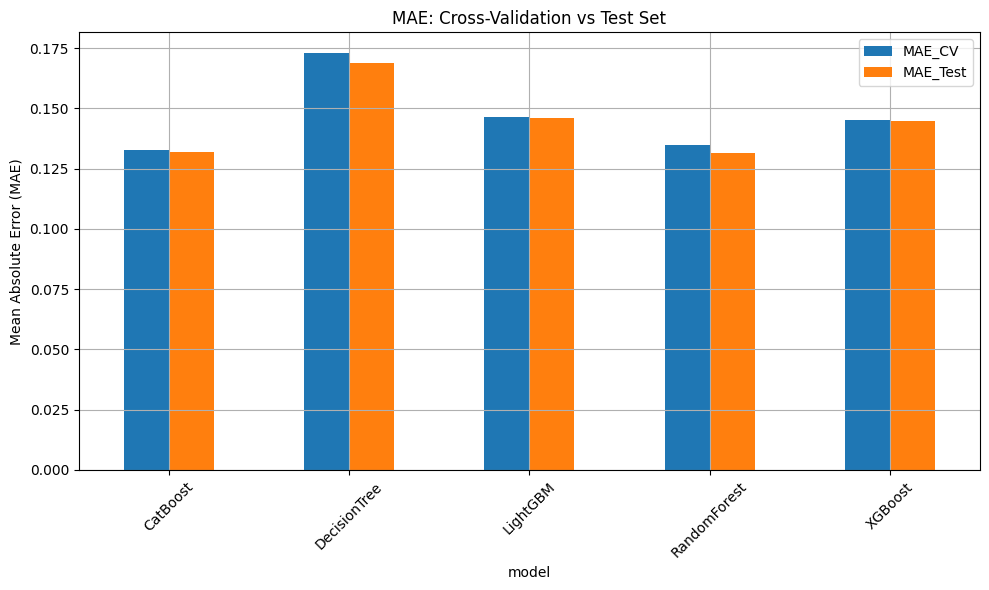

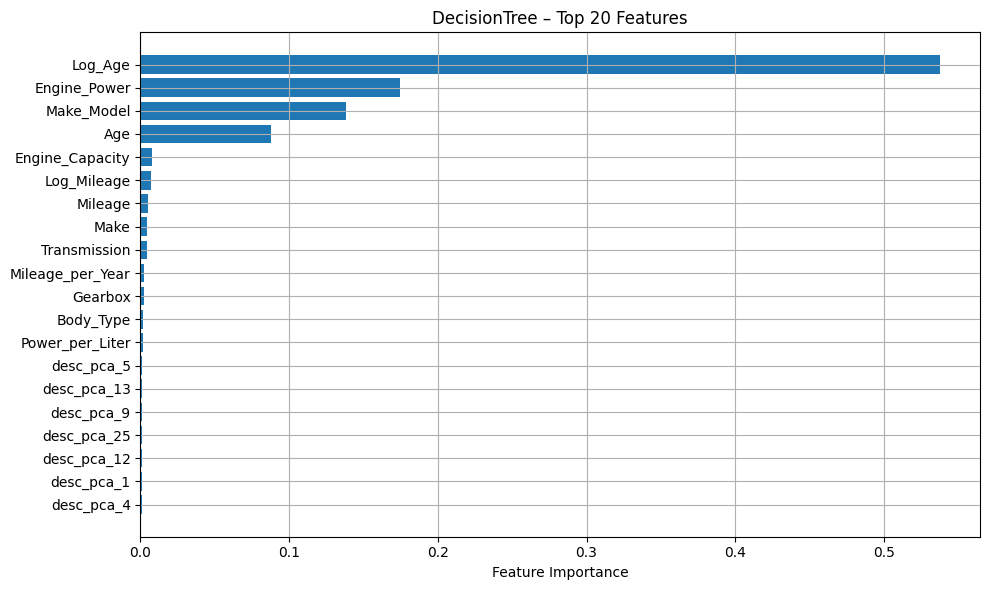

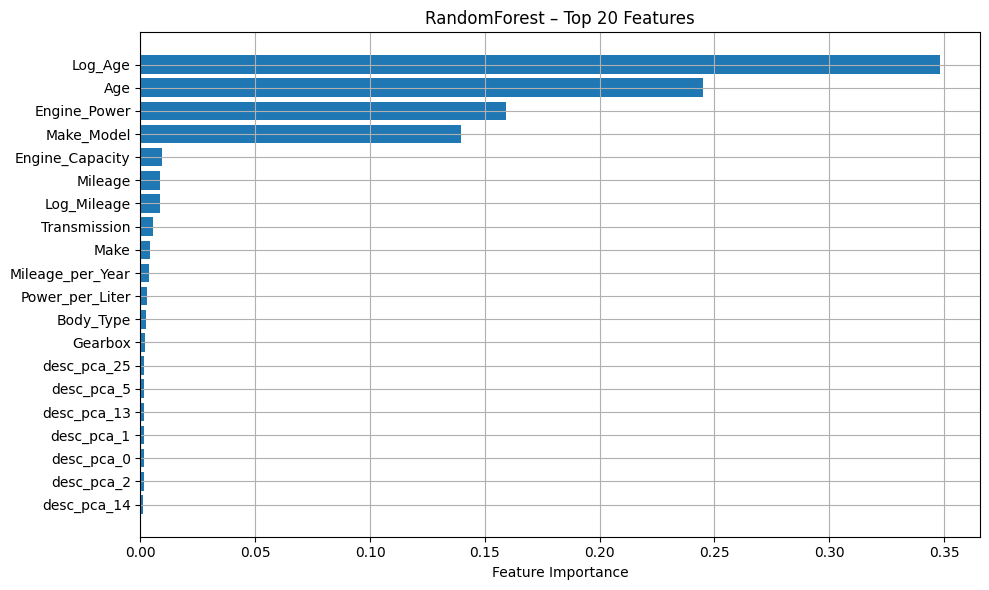

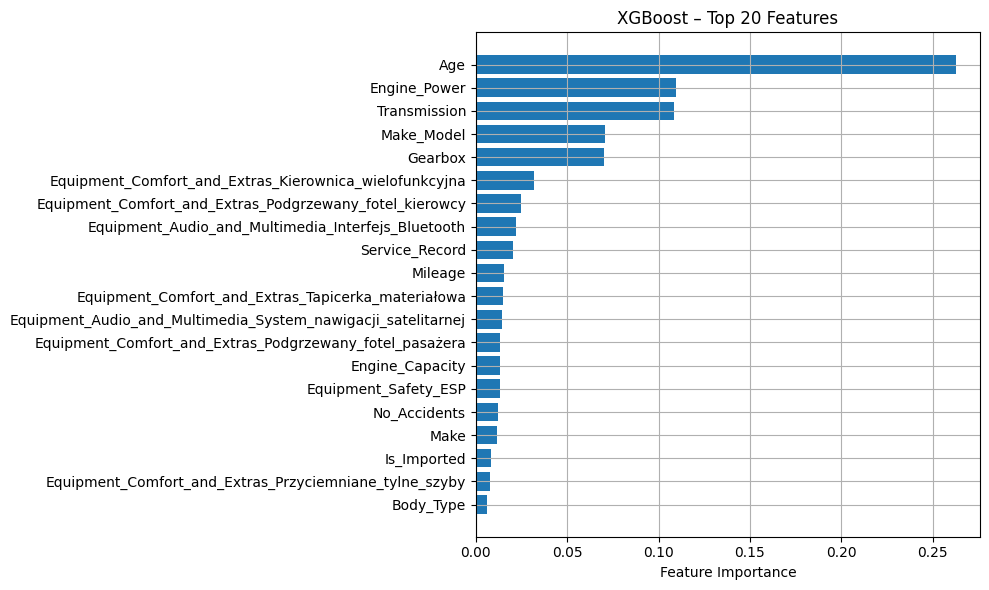

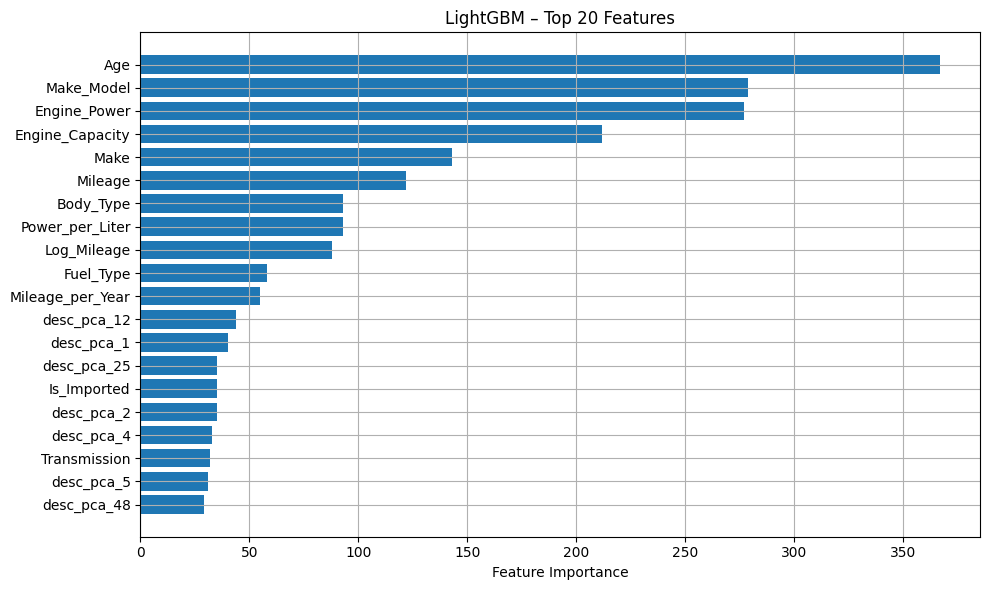

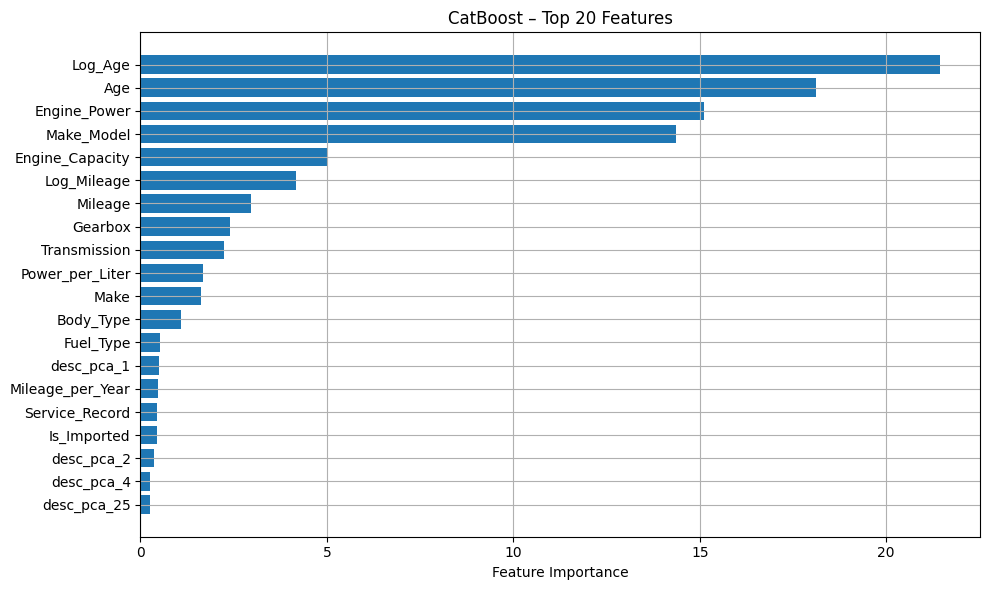

In [13]:
# --- Importy ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.base import clone
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from joblib import Parallel, delayed

# --- Ustawienia ---
warnings.filterwarnings("ignore")
np.seterr(all='ignore')

# --- Dane ---
df = cars_DecisionTree.copy()

train_df = df[df["cv_fold"] != -1].copy()
test_df = df[df["cv_fold"] == -1].copy()

X_train = train_df.drop(columns=["Log_Price", "cv_fold", "split"])
y_train = train_df["Log_Price"]
cv_fold = train_df["cv_fold"]

X_test = test_df.drop(columns=["Log_Price", "cv_fold", "split"])
y_test = test_df["Log_Price"]

# --- Usunięcie braków ---
mask_valid = X_train.notna().all(axis=1)
X_train = X_train[mask_valid]
y_train = y_train[mask_valid]
cv_fold = cv_fold[mask_valid]

# --- Wczytaj ccp_alpha ---
with open("best_ccp_alpha.txt", "r") as f:
    best_alpha = float(f.read().strip())
print(f"✅ Loaded best ccp_alpha: {best_alpha:.6f}")

# --- Modele ---
models = {
    "DecisionTree": DecisionTreeRegressor(max_depth=20, min_samples_leaf=20, ccp_alpha=best_alpha, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, tree_method="hist", enable_categorical=True, eval_metric="rmse", verbosity=0, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, n_jobs=-1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=500, verbose=False, random_state=42)
}

# --- Funkcja do CV ---
def evaluate_model(name, base_model, fold):
    model = clone(base_model)
    train_idx = cv_fold != fold
    val_idx = cv_fold == fold

    X_fold_train = X_train[train_idx]
    X_fold_val = X_train[val_idx]
    y_fold_train = y_train.loc[train_idx]
    y_fold_val = y_train.loc[val_idx]

    if name == "XGBoost":
        model.fit(X_fold_train, y_fold_train, eval_set=[(X_fold_val, y_fold_val)], verbose=False)
    elif name == "LightGBM":
        model.fit(X_fold_train, y_fold_train, eval_set=[(X_fold_val, y_fold_val)], eval_metric="rmse")
    elif name == "CatBoost":
        model.fit(X_fold_train, y_fold_train, eval_set=[(X_fold_val, y_fold_val)], use_best_model=True, verbose=False)
    else:
        model.fit(X_fold_train, y_fold_train)

    y_pred_val = model.predict(X_fold_val)

    return {
        "model": name,
        "fold": fold,
        "MAE": mean_absolute_error(y_fold_val, y_pred_val),
        "RMSE": np.sqrt(mean_squared_error(y_fold_val, y_pred_val)),
        "R2": r2_score(y_fold_val, y_pred_val)
    }

# --- Cross-validation (równolegle) ---
print("⏳ Cross-validating all models in parallel...")
tasks = [(name, model, fold) for name, model in models.items() for fold in sorted(cv_fold.unique())]
cv_results = Parallel(n_jobs=-1)(delayed(evaluate_model)(name, model, fold) for name, model, fold in tasks)

cv_df = pd.DataFrame(cv_results)
cv_summary = cv_df.groupby("model").agg(
    MAE_CV=("MAE", "mean"),
    RMSE_CV=("RMSE", "mean"),
    R2_CV=("R2", "mean")
).round(4)

# --- Test set i trenowanie końcowe ---
test_results = {"model": [], "MAE": [], "RMSE": [], "R2": []}
trained_models = {}

for name, base_model in models.items():
    model = clone(base_model)
    if name == "XGBoost":
        model.set_params(early_stopping_rounds=None)
    elif name == "LightGBM":
        model.set_params(early_stopping_round=None)
    elif name == "CatBoost":
        model.set_params(early_stopping_rounds=None)

    model.fit(X_train, y_train)
    trained_models[name] = model

    y_pred_test = model.predict(X_test)
    test_results["model"].append(name)
    test_results["MAE"].append(mean_absolute_error(y_test, y_pred_test))
    test_results["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    test_results["R2"].append(r2_score(y_test, y_pred_test))

test_df = pd.DataFrame(test_results).set_index("model").round(4)
test_df.columns = ["MAE_Test", "RMSE_Test", "R2_Test"]

# --- Finalna tabela ---
final_summary = pd.concat([cv_summary, test_df], axis=1)
print("\n📊 Cross-validation and test set performance:")
print(final_summary)

# --- Wykres MAE ---
final_summary[["MAE_CV", "MAE_Test"]].plot(kind="bar", figsize=(10, 6), title="MAE: Cross-Validation vs Test Set")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Ważność cech ---
def plot_feature_importance(model, X, model_name, top_n=20):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        features = X.columns
    elif hasattr(model, "get_booster"):
        booster = model.get_booster()
        fmap = booster.feature_names
        score_dict = booster.get_score(importance_type="gain")
        importances = np.array([score_dict.get(f, 0) for f in fmap])
        features = fmap
    else:
        print(f"⚠️ {model_name} does not expose feature_importances_")
        return

    top_idx = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), importances[top_idx], align="center")
    plt.yticks(range(top_n), [features[i] for i in top_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"{model_name} – Top {top_n} Features")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# --- Wykresy dla każdego modelu ---
for name, model in trained_models.items():
    plot_feature_importance(model, X_train, name)